In [1]:
from script.NeuralNets.Networks import ICNN, ICNNLogical, ICNNApproxMax
from script.NeuralNets.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.NeuralNets.trainFunction import train_icnn
from script.eval import Plots_for
from script.DHOV.DataSampling import samples_uniform_over
from script.DHOV.MultiDHOV import plt_inc_amb
import torch


Init hyperparameter: epochs, batch size, sample count

In [2]:
epochs = 1000
number_of_train_samples = 1000
batch_size = 10000
optimizer = "SdLBFGS"
adapt_lambda="included"
hyper_lambda=1
preemptive_stop=True
net_size = [2, 5, 4, 1]

Init the data sets or choose data set

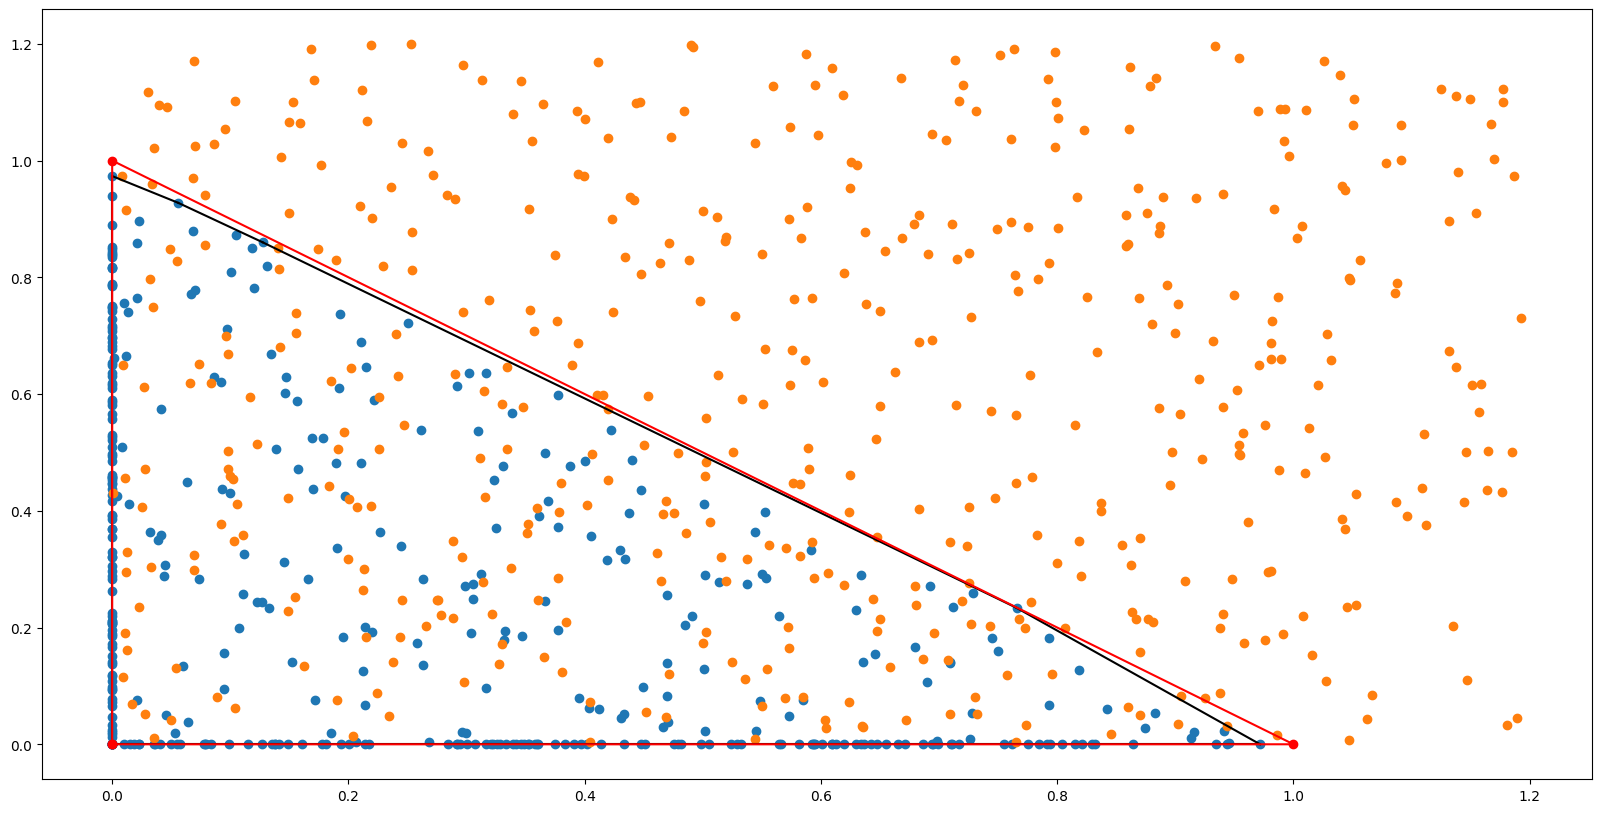

In [3]:
x_range = [-0.3, 1.3]
y_range = [-0.3, 1.3]

bb_lb = [0, 0]
bb_ub = [1, 1]

true_extremal_points = Rhombus().get_extremal_points()
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range)  #samples will be split in inside and outside the rhombus
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data=ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
included_space = torch.nn.ReLU()(included_space)

# we only use the uniform samples
ambient_space = torch.nn.ReLU()(ambient_space)
ambient_space = samples_uniform_over(ambient_space, number_of_train_samples // 2, [torch.tensor([0,0]), torch.tensor([1.2,1.2])], keep_samples=False)

dummy_icnn = ICNN([2, 2, 2])
plots = Plots_for(0, dummy_icnn, included_space, ambient_space, x_range, y_range, extr=[[0, 0], [1, 0], [0, 1]])
plots.plt_initial()

Init the architectures for which to test

In [5]:
"""sequential = SequentialNN(net_size)

icnn_standard_uninit = ICNN(net_size)
icnn_standard_uninit.init_with_box_bounds(bb_lb, bb_ub)"""

icnn_standard_init = ICNN(net_size)
icnn_standard_init.init_with_box_bounds(bb_lb, bb_ub)

icnn_logical = ICNNLogical(net_size)
icnn_logical.init_with_box_bounds(bb_lb, bb_ub)

"""icnn_exact_max = ICNNApproxMax(net_size, maximum_function="max")
icnn_exact_max.init_with_box_bounds(bb_lb, bb_ub)

icnn_approx_bolt = ICNNApproxMax(net_size, maximum_function="Boltzmann")
icnn_approx_bolt.init_with_box_bounds(bb_lb, bb_ub)

icnn_approx_lse = ICNNApproxMax(net_size, maximum_function="LogSumExp")
icnn_approx_lse.init_with_box_bounds(bb_lb, bb_ub)

icnn_approx_mellow = ICNNApproxMax(net_size, maximum_function="Mellowmax")
icnn_approx_mellow.init_with_box_bounds(bb_lb, bb_ub)

icnn_approx_smu = ICNNApproxMax(net_size, maximum_function="SMU")
icnn_approx_smu.init_with_box_bounds(bb_lb, bb_ub)
"""

'icnn_exact_max = ICNNApproxMax(net_size, maximum_function="max")\nicnn_exact_max.init_with_box_bounds(bb_lb, bb_ub)\n\nicnn_approx_bolt = ICNNApproxMax(net_size, maximum_function="Boltzmann")\nicnn_approx_bolt.init_with_box_bounds(bb_lb, bb_ub)\n\nicnn_approx_lse = ICNNApproxMax(net_size, maximum_function="LogSumExp")\nicnn_approx_lse.init_with_box_bounds(bb_lb, bb_ub)\n\nicnn_approx_mellow = ICNNApproxMax(net_size, maximum_function="Mellowmax")\nicnn_approx_mellow.init_with_box_bounds(bb_lb, bb_ub)\n\nicnn_approx_smu = ICNNApproxMax(net_size, maximum_function="SMU")\nicnn_approx_smu.init_with_box_bounds(bb_lb, bb_ub)\n'

Apply standard training

In [8]:
"""print(0)
train_icnn(sequential, train_loader, ambient_loader, epochs=epochs, verbose=False, sequential=True, force_convex=False, print_last_loss=True)"""

"""print(1)
train_icnn(icnn_standard_uninit, train_loader, ambient_loader, epochs=epochs, optimizer=optimizer, sequential=False, adapt_lambda=adapt_lambda, hyper_lambda=hyper_lambda, preemptive_stop=preemptive_stop, print_last_loss=True)"""

print(1.5)
train_icnn(icnn_standard_init, train_loader, ambient_loader, epochs=epochs, optimizer=optimizer, sequential=False, adapt_lambda=adapt_lambda, hyper_lambda=hyper_lambda, preemptive_stop=preemptive_stop, print_last_loss=True)

print(2)
train_icnn(icnn_logical, train_loader, ambient_loader, epochs=epochs, optimizer=optimizer, sequential=False, adapt_lambda=adapt_lambda, hyper_lambda=hyper_lambda, preemptive_stop=preemptive_stop, print_last_loss=True)
"""
print(2.5)
train_icnn(icnn_approx_smu, train_loader, ambient_loader, epochs=epochs, optimizer=optimizer, sequential=False, adapt_lambda=adapt_lambda, hyper_lambda=hyper_lambda, preemptive_stop=preemptive_stop, print_last_loss=True)"""

"""print(3)
train_icnn(icnn_exact_max, train_loader, ambient_loader, epochs=epochs, optimizer=optimizer, sequential=False, adapt_lambda=adapt_lambda, hyper_lambda=hyper_lambda, preemptive_stop=preemptive_stop, print_last_loss=True)

print(4)
train_icnn(icnn_approx_bolt, train_loader, ambient_loader, epochs=epochs, optimizer=optimizer, sequential=False, adapt_lambda=adapt_lambda, hyper_lambda=hyper_lambda, preemptive_stop=preemptive_stop, print_last_loss=True)

print(5)
train_icnn(icnn_approx_lse, train_loader, ambient_loader, epochs=epochs, optimizer=optimizer, sequential=False, adapt_lambda=adapt_lambda, hyper_lambda=hyper_lambda, preemptive_stop=preemptive_stop, print_last_loss=True)

print(6)
train_icnn(icnn_approx_mellow, train_loader, ambient_loader, epochs=epochs, optimizer=optimizer, sequential=False, adapt_lambda=adapt_lambda, hyper_lambda=hyper_lambda, preemptive_stop=preemptive_stop, print_last_loss=True)

"""

1.5
preemptive stop at epoch 191
Stop after 191 Epochs
test for test setup
test run 1 iterations,  with mean loss = 0.10219905823373868
test for without test setup
test run 1 iterations,  with mean loss = 0.10219905823373868
2
preemptive stop at epoch 77
Stop after 77 Epochs
test for test setup
test run 1 iterations,  with mean loss = 0.7527493871749535
test for without test setup
test run 1 iterations,  with mean loss = 0.7527493871749535


'print(3)\ntrain_icnn(icnn_exact_max, train_loader, ambient_loader, epochs=epochs, optimizer=optimizer, sequential=False, adapt_lambda=adapt_lambda, hyper_lambda=hyper_lambda, preemptive_stop=preemptive_stop, print_last_loss=True)\n\nprint(4)\ntrain_icnn(icnn_approx_bolt, train_loader, ambient_loader, epochs=epochs, optimizer=optimizer, sequential=False, adapt_lambda=adapt_lambda, hyper_lambda=hyper_lambda, preemptive_stop=preemptive_stop, print_last_loss=True)\n\nprint(5)\ntrain_icnn(icnn_approx_lse, train_loader, ambient_loader, epochs=epochs, optimizer=optimizer, sequential=False, adapt_lambda=adapt_lambda, hyper_lambda=hyper_lambda, preemptive_stop=preemptive_stop, print_last_loss=True)\n\nprint(6)\ntrain_icnn(icnn_approx_mellow, train_loader, ambient_loader, epochs=epochs, optimizer=optimizer, sequential=False, adapt_lambda=adapt_lambda, hyper_lambda=hyper_lambda, preemptive_stop=preemptive_stop, print_last_loss=True)\n\n'

Plot results

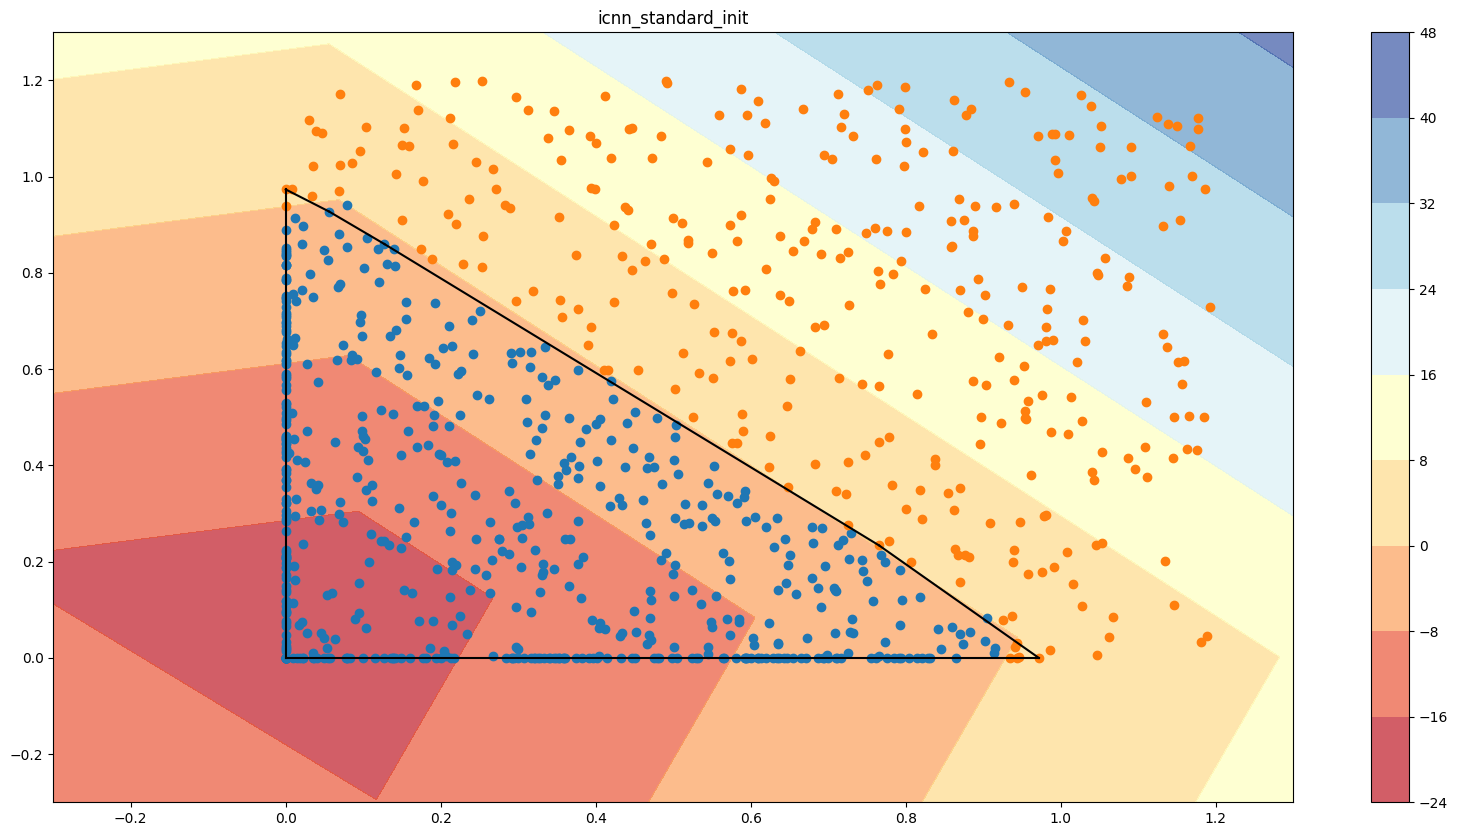

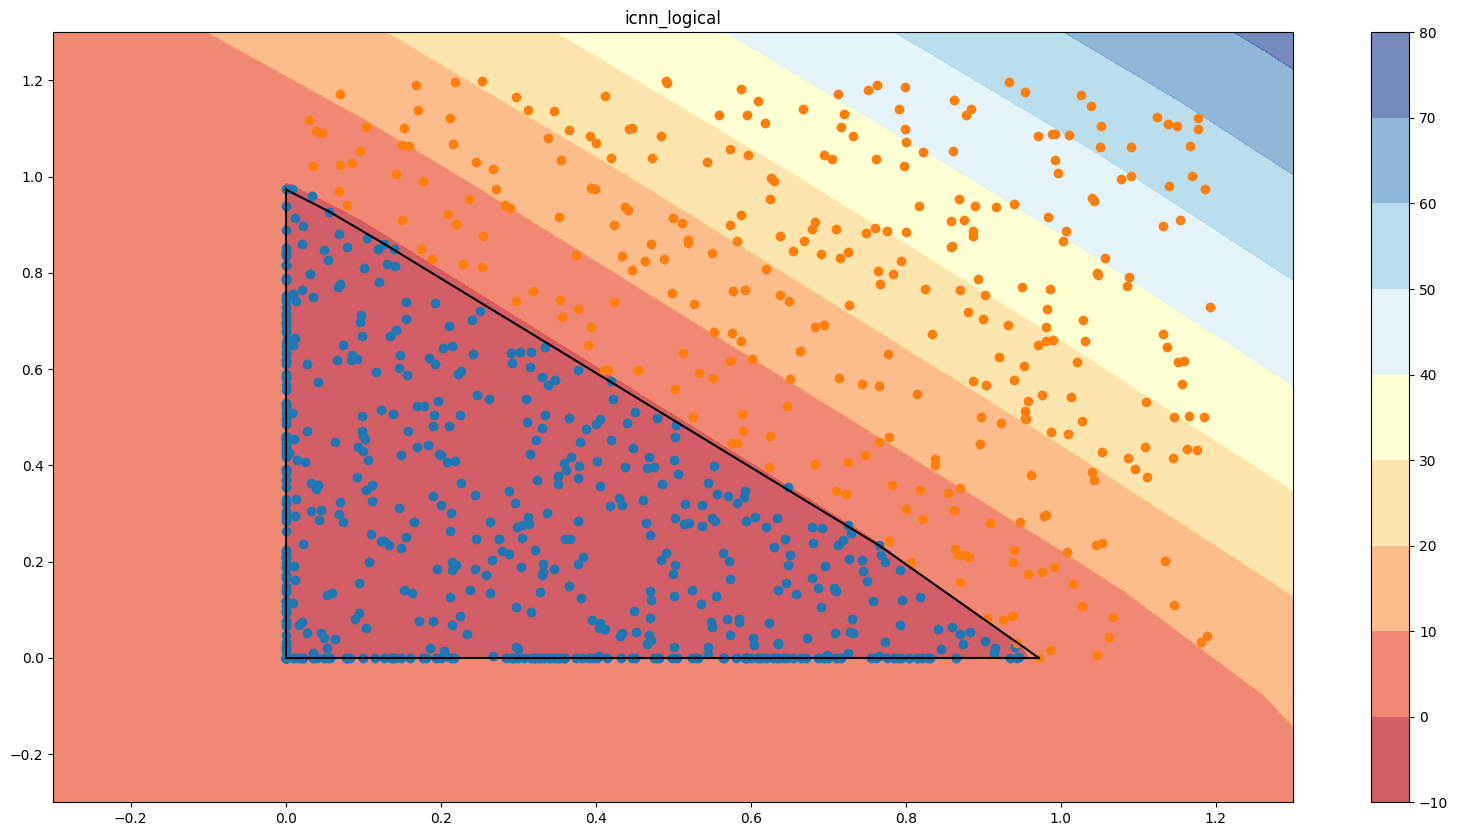

'plots = Plots_for(0, icnn_exact_max, included_space, ambient_space, x_range, y_range)\nplots.plt_mesh(title="icnn_exact_max")'

In [9]:
"""plots = Plots_for(0, sequential, included_space, ambient_space, x_range, y_range)
plots.plt_mesh(title="sequential")"""

"""plots = Plots_for(0, icnn_standard_uninit, included_space, ambient_space, x_range, y_range)
plots.plt_mesh(title="icnn_standard_uninit")"""

plots = Plots_for(0, icnn_standard_init, included_space, ambient_space, x_range, y_range)
plots.plt_mesh(title="icnn_standard_init")

plots = Plots_for(0, icnn_logical, included_space, ambient_space, x_range, y_range)
plots.plt_mesh(title="icnn_logical")

"""plots = Plots_for(0, icnn_exact_max, included_space, ambient_space, x_range, y_range)
plots.plt_mesh(title="icnn_exact_max")"""

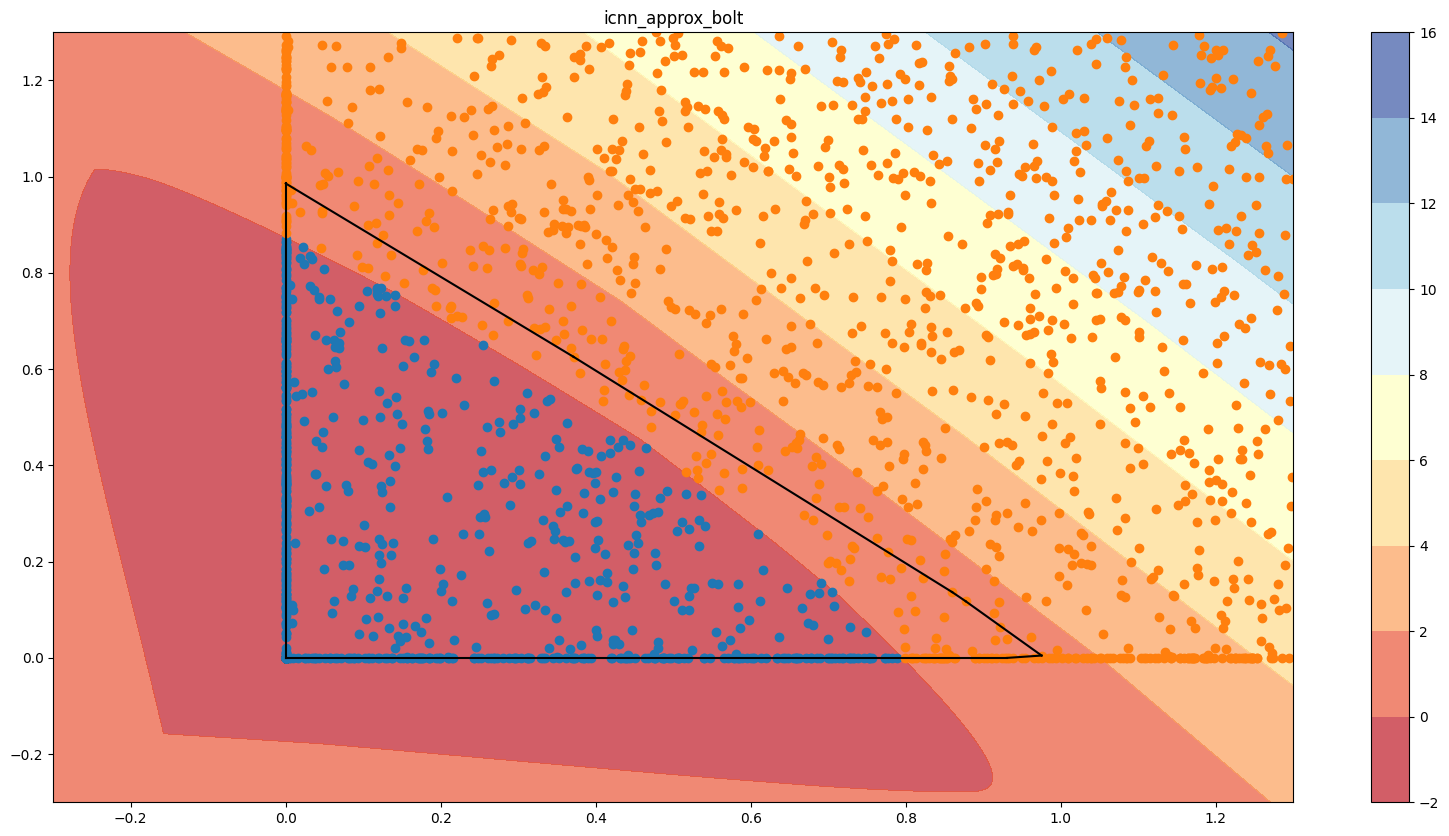

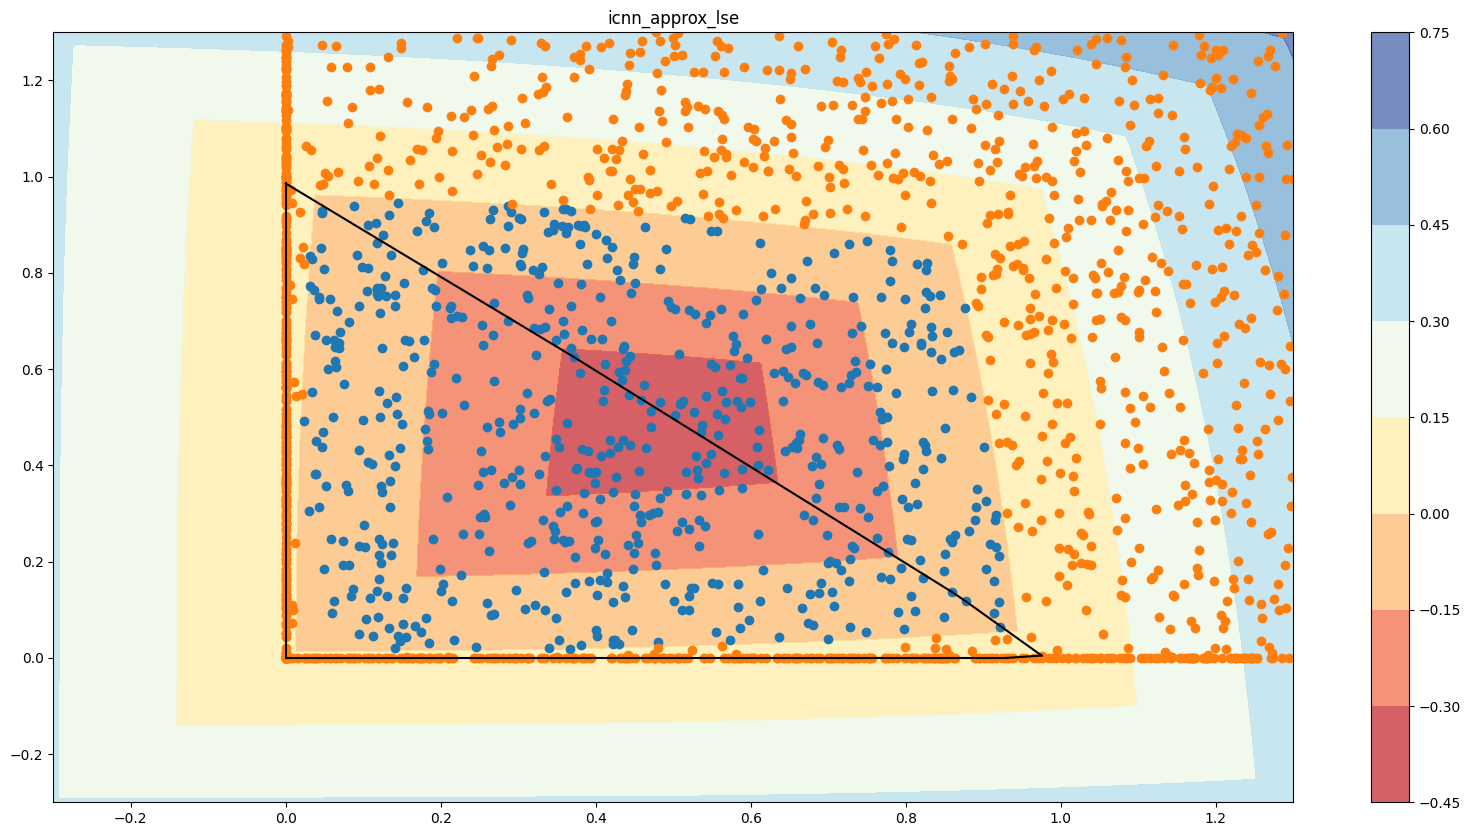

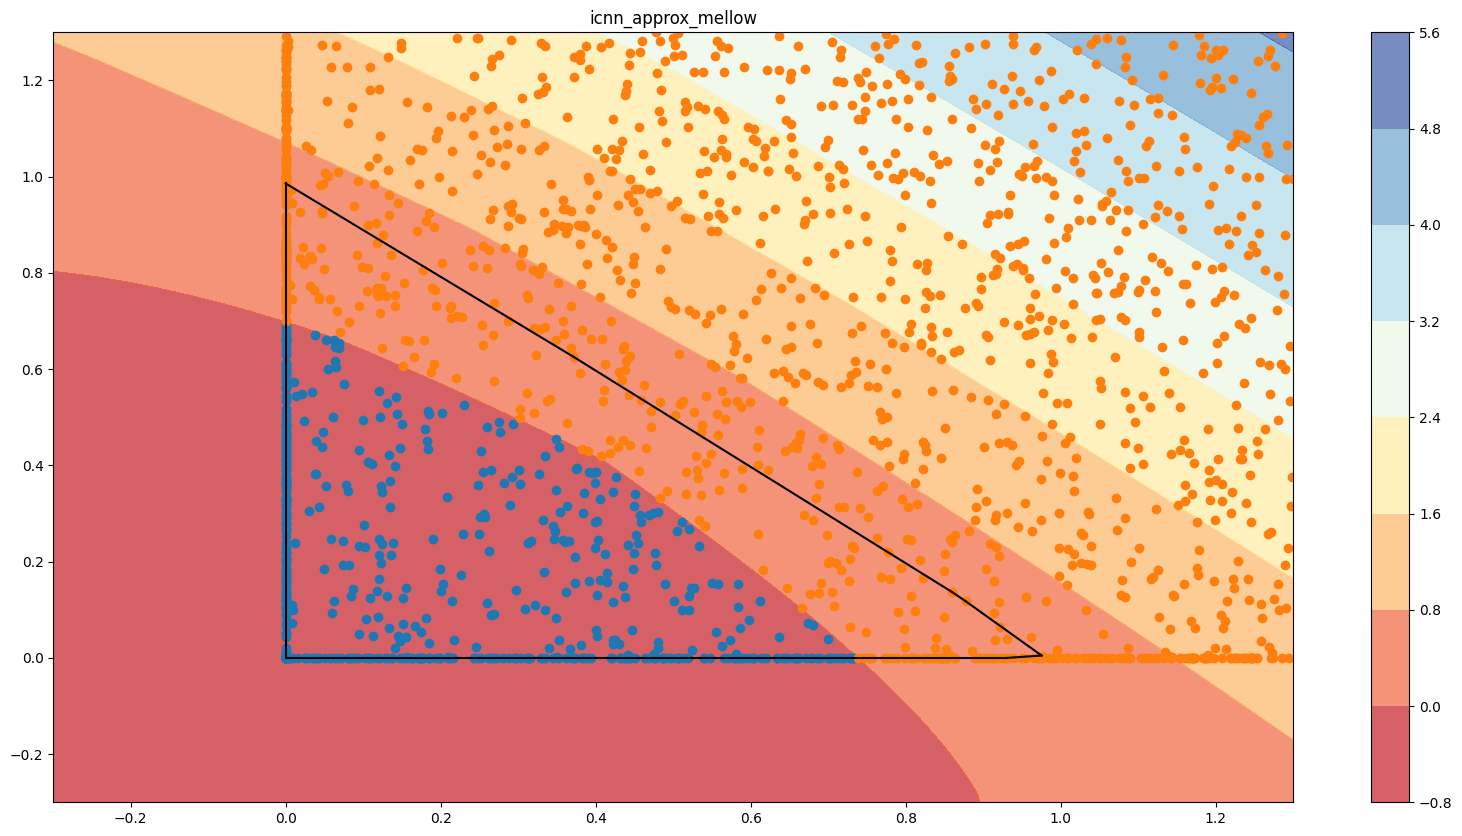

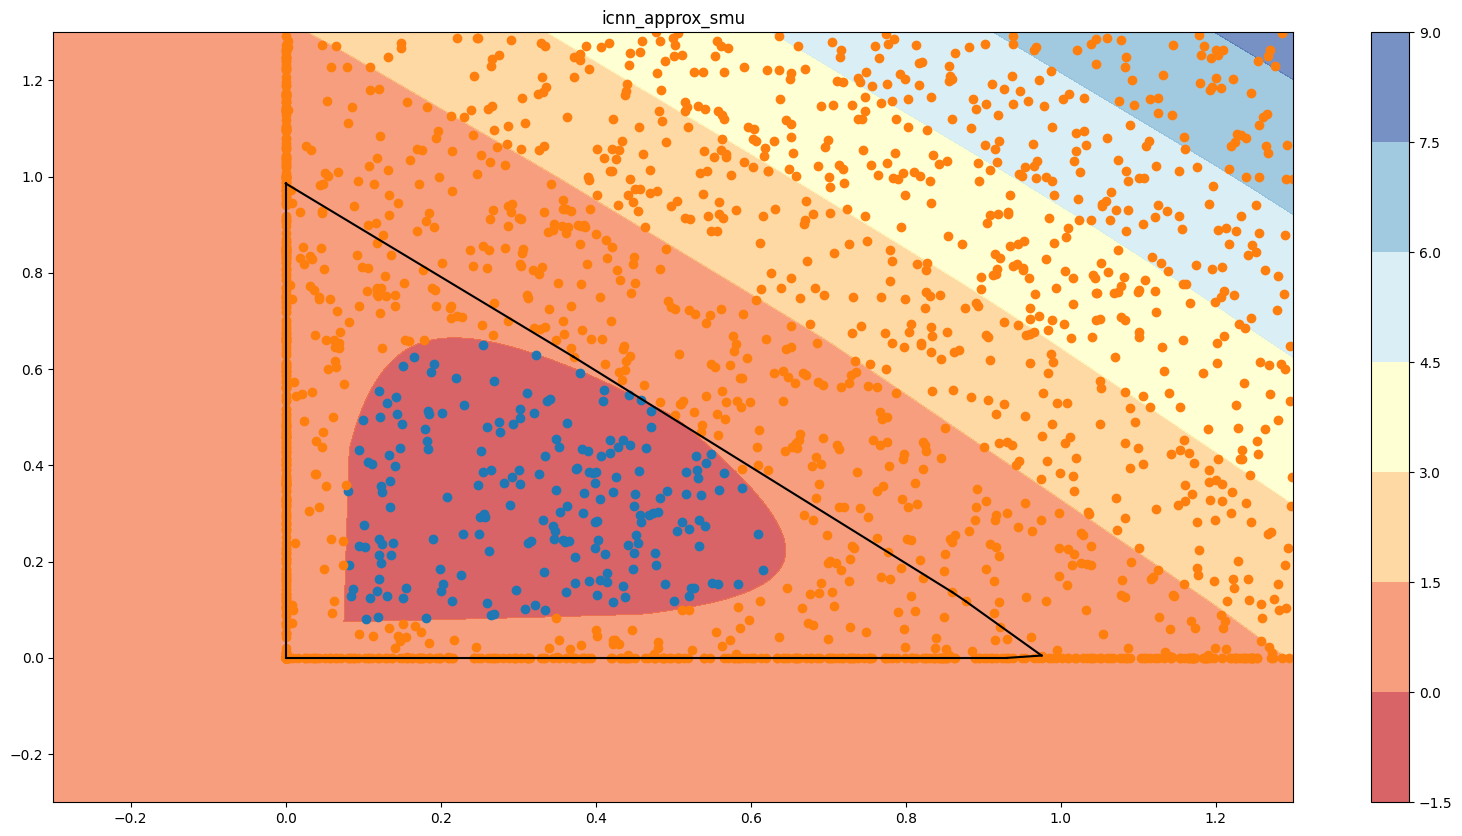

In [37]:
plots = Plots_for(0, icnn_approx_bolt, included_space, ambient_space, x_range, y_range)
plots.plt_mesh(title="icnn_approx_bolt")

plots = Plots_for(0, icnn_approx_lse, included_space, ambient_space, x_range, y_range)
plots.plt_mesh(title="icnn_approx_lse")

plots = Plots_for(0, icnn_approx_mellow, included_space, ambient_space, x_range, y_range)
plots.plt_mesh(title="icnn_approx_mellow")

plots = Plots_for(0, icnn_approx_smu, included_space, ambient_space, x_range, y_range)
plots.plt_mesh(title="icnn_approx_smu")

Switch from approx max to exact max

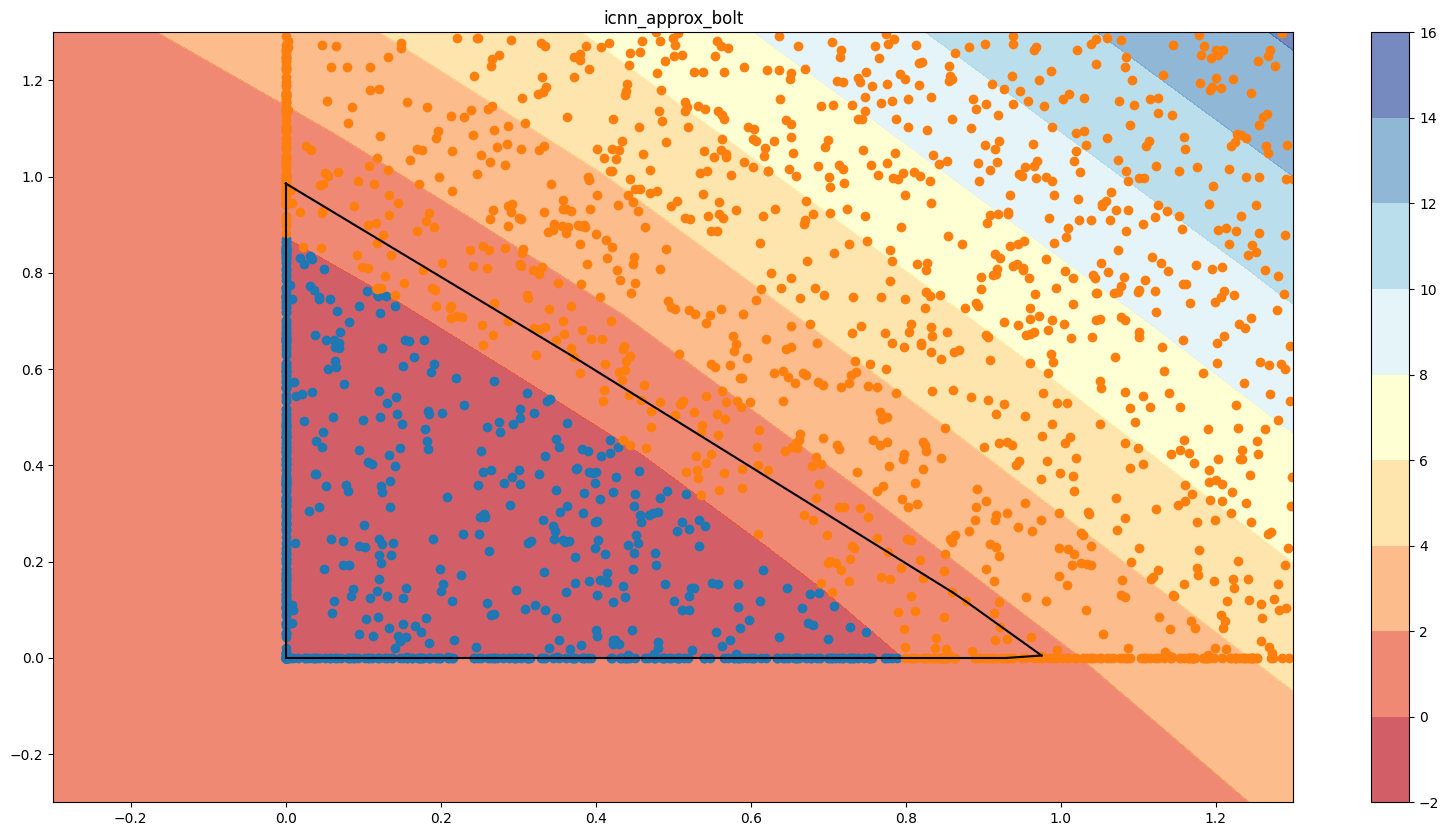

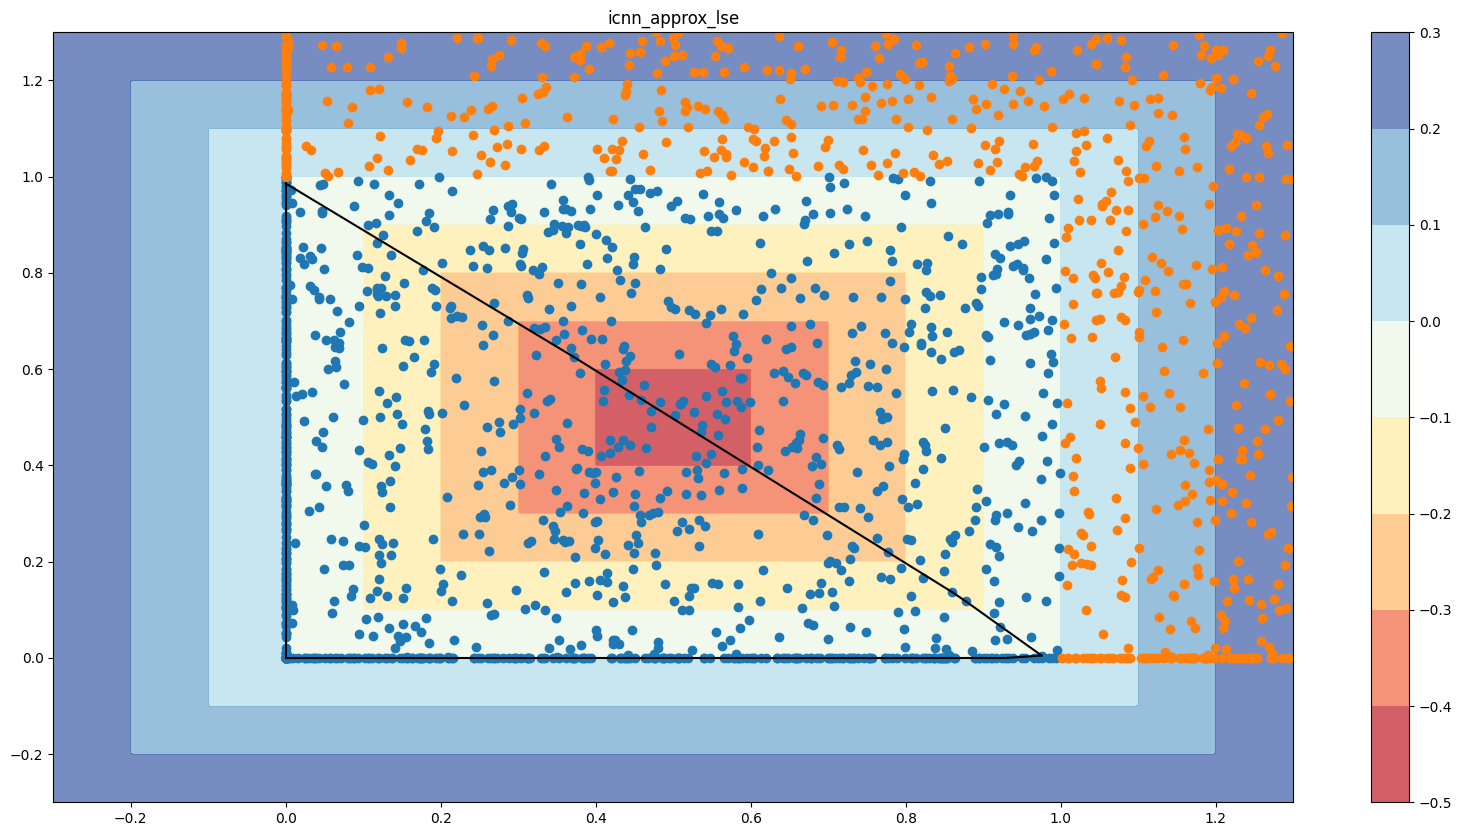

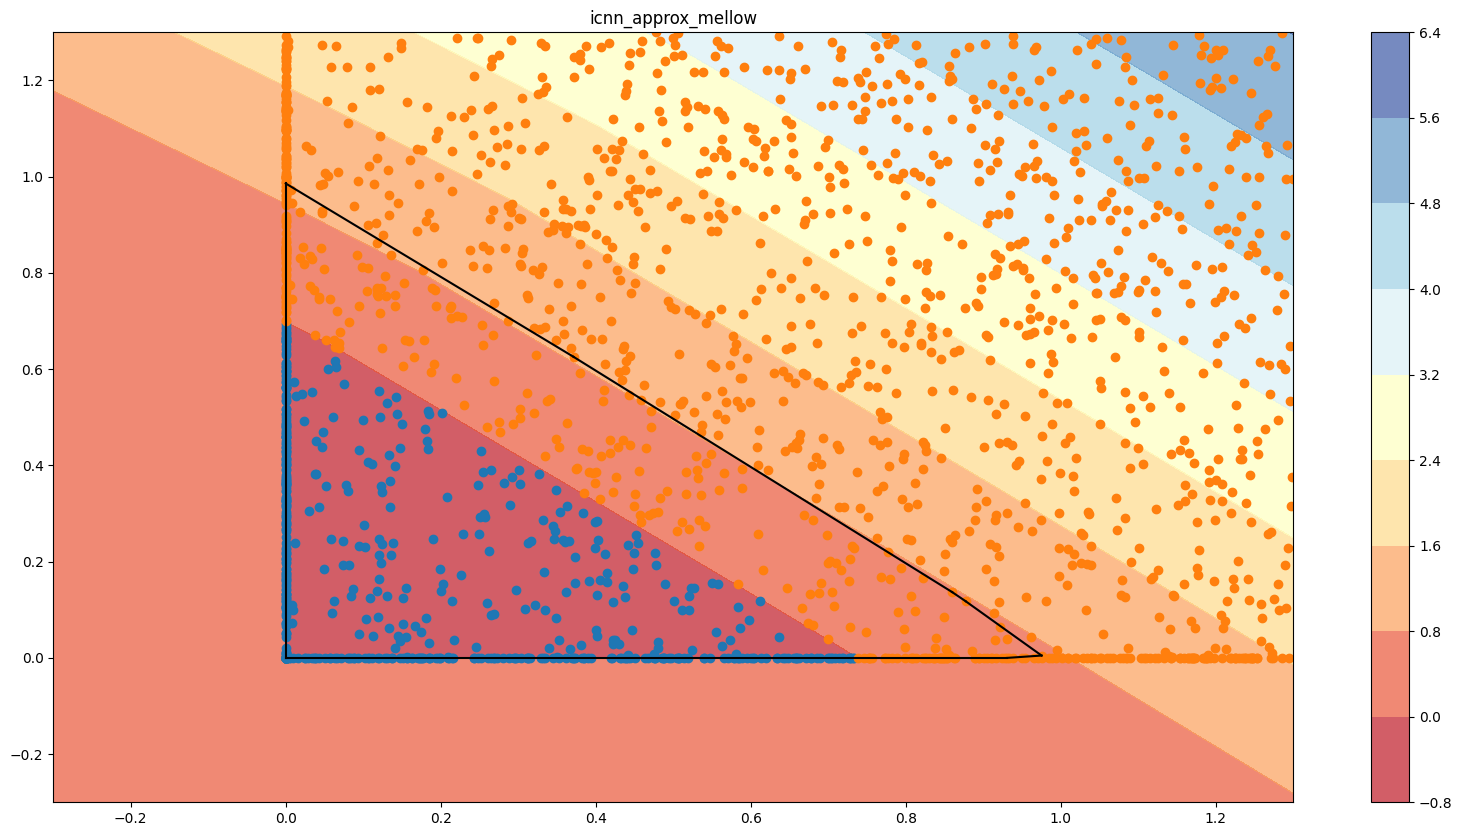

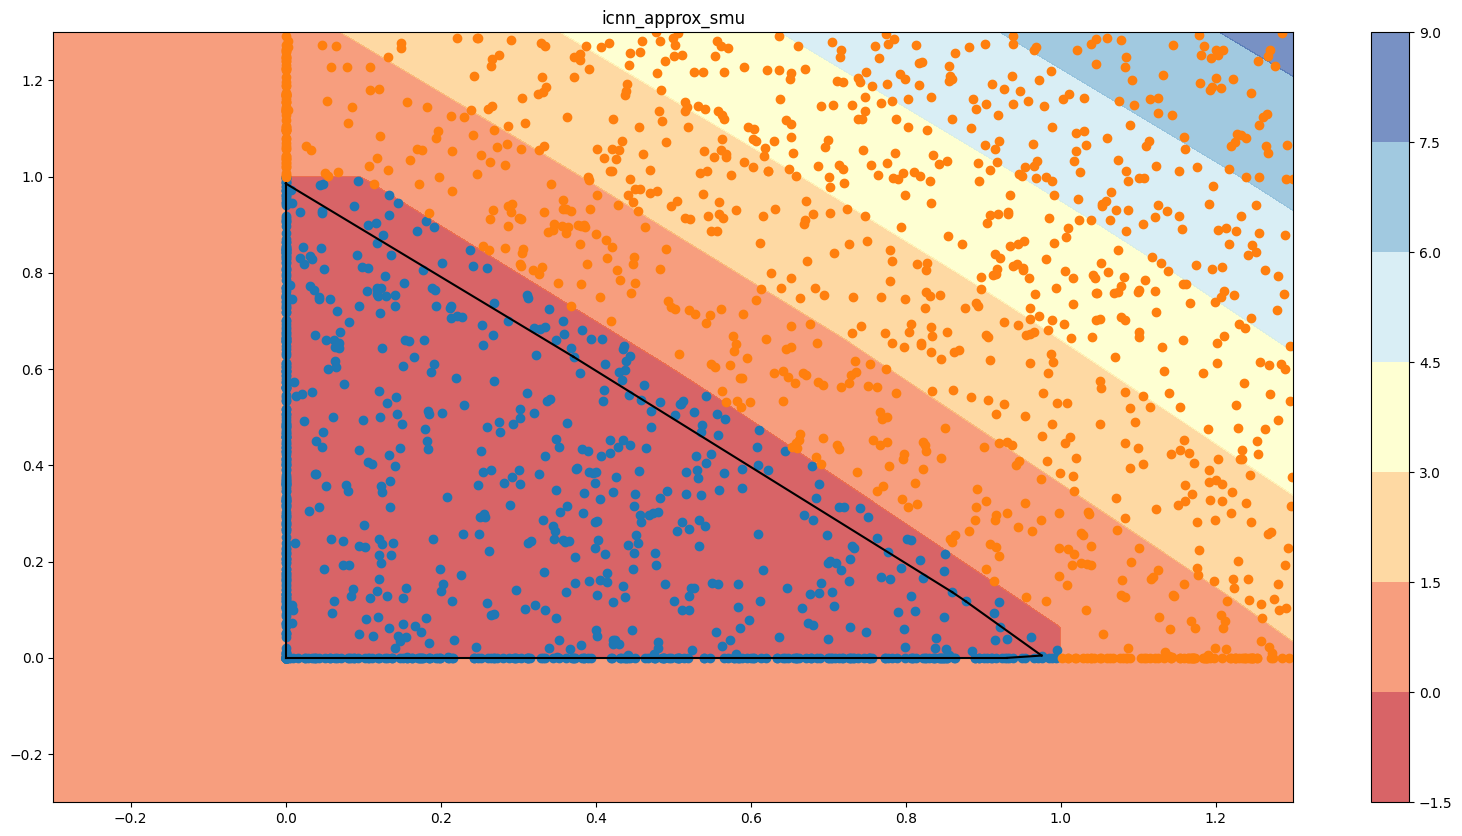

In [38]:
use_ts = False
icnn_approx_bolt.use_training_setup = use_ts
icnn_approx_lse.use_training_setup = use_ts
icnn_approx_mellow.use_training_setup = use_ts
icnn_approx_smu.use_training_setup = use_ts

plots = Plots_for(0, icnn_approx_bolt, included_space, ambient_space, x_range, y_range)
plots.plt_mesh(title="icnn_approx_bolt")

plots = Plots_for(0, icnn_approx_lse, included_space, ambient_space, x_range, y_range)
plots.plt_mesh(title="icnn_approx_lse")

plots = Plots_for(0, icnn_approx_mellow, included_space, ambient_space, x_range, y_range)
plots.plt_mesh(title="icnn_approx_mellow")

plots = Plots_for(0, icnn_approx_smu, included_space, ambient_space, x_range, y_range)
plots.plt_mesh(title="icnn_approx_smu")